# **주제 : 차종과 지역 교통 사고율의 상관성 분석**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 시각화 때 한글 사용을 위해 글씨 다운로드 (출력 숨기기)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
# 모듈 불러오기

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
# 한글 폰트 설정 (예: 나눔고딕 사용)
matplotlib.rcParams['font.family'] = 'NanumGothic'  # 나눔 고딕 설정 (다른 시스템에서는 다른 폰트로 설정할 수 있음)
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 표시 문제 해결

## 데이터 전처리

### 교통사고건수 월별 데이터 전처리

In [51]:
# 데이터 로드 후 데이터 형태 확인

df1 = pd.read_excel('/content/drive/MyDrive/빅데이터/개인 과제/교통사고건수/2011-2013.xls')
df2 = pd.read_excel('/content/drive/MyDrive/빅데이터/개인 과제/교통사고건수/2014-2018.xls')
df3 = pd.read_excel('/content/drive/MyDrive/빅데이터/개인 과제/교통사고건수/2019-2023.xls')

df1 # 출처와 같이 필요없는 부분이 있고, 2011, 2011.1과 같이 행의 이름도 정리해야 됨

,시도,시군구,2011,2011.1,2011.2,2011.3,2011.4,2011.5,2011.6,2011.7,...,2013.2,2013.3,2013.4,2013.5,2013.6,2013.7,2013.8,2013.9,2013.10,2013.11
0,시도,시군구,01월,02월,03월,04월,05월,06월,07월,08월,...,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월
1,서울,종로구,115,99,116,110,122,116,103,122,...,122,118,102,127,96,81,90,108,125,106
2,서울,마포구,135,112,131,158,145,136,158,122,...,153,158,175,140,136,159,156,158,155,130
3,서울,강서구,133,130,144,165,173,156,162,168,...,152,153,149,157,151,155,146,168,127,124
4,서울,구로구,124,112,122,126,125,133,115,130,...,97,127,117,130,131,97,146,139,120,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,경기,포천시,48,49,71,52,74,76,63,70,...,52,63,64,84,82,84,75,91,78,82
229,경기,가평군,33,21,20,32,32,23,28,44,...,19,29,35,35,27,47,38,32,23,22
230,경기,양평군,26,22,26,39,41,36,34,40,...,29,28,45,36,28,42,37,39,37,21
231,경기,이천시,81,53,52,79,77,55,72,95,...,61,80,79,77,87,78,69,76,72,55


In [52]:
df1 = df1.iloc[1:-1]
df2 = df2.iloc[1:-1]
df3 = df3.iloc[1:-1]

df1

,시도,시군구,2011,2011.1,2011.2,2011.3,2011.4,2011.5,2011.6,2011.7,...,2013.2,2013.3,2013.4,2013.5,2013.6,2013.7,2013.8,2013.9,2013.10,2013.11
1,서울,종로구,115,99,116,110,122,116,103,122,...,122,118,102,127,96,81,90,108,125,106
2,서울,마포구,135,112,131,158,145,136,158,122,...,153,158,175,140,136,159,156,158,155,130
3,서울,강서구,133,130,144,165,173,156,162,168,...,152,153,149,157,151,155,146,168,127,124
4,서울,구로구,124,112,122,126,125,133,115,130,...,97,127,117,130,131,97,146,139,120,111
5,서울,영등포구,181,141,176,217,233,192,200,180,...,180,193,194,191,174,177,187,182,191,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,경기,연천군,9,6,11,15,11,9,15,15,...,9,9,12,17,20,14,12,21,15,20
228,경기,포천시,48,49,71,52,74,76,63,70,...,52,63,64,84,82,84,75,91,78,82
229,경기,가평군,33,21,20,32,32,23,28,44,...,19,29,35,35,27,47,38,32,23,22
230,경기,양평군,26,22,26,39,41,36,34,40,...,29,28,45,36,28,42,37,39,37,21


In [53]:
print(len(df1['시군구'].unique()))
print(len(df2['시군구'].unique()))
print(len(df3['시군구'].unique()))

209
208
207


In [54]:
# 각 데이터프레임의 '시군구' 유일한 값들 구하기
unique_df1 = set(df1['시군구'].unique())
unique_df2 = set(df2['시군구'].unique())
unique_df3 = set(df3['시군구'].unique())

In [55]:
# data 3에 없고 data1에만 있는 시군구
only_df1 = unique_df1 - unique_df3

# 결과 출력
print("df3에 없고 df1에만 있는 시군구:", only_df1)

df3에 없고 df1에만 있는 시군구: {'청원군', '연기군'}


In [56]:
# data 3에 없고 data2에만 있는 시군구
only_df2 = unique_df2 - unique_df3

# 결과 출력
print("df3에 없고 df2에만 있는 시군구:", only_df2)

df3에 없고 df2에만 있는 시군구: {'청원군'}


In [57]:
# '청원군'과 '연기군'을 제거
df1 = df1[(df1['시군구'] != '청원군') & (df1['시군구'] != '연기군')]

# '청원군' 제거
df2 = df2[(df2['시군구'] != '청원군')]

In [58]:
print(len(df1['시군구'].unique()))
print(len(df2['시군구'].unique()))
print(len(df3['시군구'].unique()))

207
207
207


In [59]:
df1

,시도,시군구,2011,2011.1,2011.2,2011.3,2011.4,2011.5,2011.6,2011.7,...,2013.2,2013.3,2013.4,2013.5,2013.6,2013.7,2013.8,2013.9,2013.10,2013.11
1,서울,종로구,115,99,116,110,122,116,103,122,...,122,118,102,127,96,81,90,108,125,106
2,서울,마포구,135,112,131,158,145,136,158,122,...,153,158,175,140,136,159,156,158,155,130
3,서울,강서구,133,130,144,165,173,156,162,168,...,152,153,149,157,151,155,146,168,127,124
4,서울,구로구,124,112,122,126,125,133,115,130,...,97,127,117,130,131,97,146,139,120,111
5,서울,영등포구,181,141,176,217,233,192,200,180,...,180,193,194,191,174,177,187,182,191,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,경기,연천군,9,6,11,15,11,9,15,15,...,9,9,12,17,20,14,12,21,15,20
228,경기,포천시,48,49,71,52,74,76,63,70,...,52,63,64,84,82,84,75,91,78,82
229,경기,가평군,33,21,20,32,32,23,28,44,...,19,29,35,35,27,47,38,32,23,22
230,경기,양평군,26,22,26,39,41,36,34,40,...,29,28,45,36,28,42,37,39,37,21


In [60]:
df2

,시도,시군구,2014,2014.1,2014.2,2014.3,2014.4,2014.5,2014.6,2014.7,...,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8,2018.9,2018.10,2018.11
1,서울,종로구,78,70,102,108,128,126,112,119,...,101,93,102,96,89,90,91,113,75,97
2,서울,마포구,115,105,136,134,154,174,168,141,...,127,129,144,141,140,124,153,148,148,127
3,서울,강서구,104,120,173,120,170,161,162,160,...,109,124,103,131,115,141,116,122,146,127
4,서울,구로구,114,100,112,127,153,139,141,142,...,124,114,137,126,148,117,142,147,128,128
5,서울,영등포구,154,130,194,185,220,168,191,199,...,193,197,196,221,195,223,221,207,220,213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,경기,연천군,12,6,10,14,16,16,21,31,...,13,12,14,20,17,13,21,19,6,23
227,경기,포천시,53,39,55,73,80,80,61,94,...,68,70,61,73,82,81,71,82,70,63
228,경기,가평군,24,17,24,17,53,37,45,44,...,27,28,43,31,47,56,30,28,24,21
229,경기,양평군,32,25,22,37,39,22,41,33,...,30,43,43,40,57,54,63,53,51,26


In [61]:
df3

,시도,시군구,2019,2019.1,2019.2,2019.3,2019.4,2019.5,2019.6,2019.7,...,2023.2,2023.3,2023.4,2023.5,2023.6,2023.7,2023.8,2023.9,2023.10,2023.11
1,서울,종로구,87,66,87,85,112,95,83,115,...,67,73,88,82,95,83,81,96,80,100
2,서울,마포구,110,112,108,104,139,129,148,145,...,93,111,117,104,103,120,115,122,104,104
3,서울,강서구,136,131,144,140,153,143,147,189,...,112,139,134,133,121,128,153,135,126,119
4,서울,구로구,140,100,132,138,129,134,112,124,...,101,99,122,119,136,111,114,123,131,135
5,서울,영등포구,197,139,187,228,214,217,212,214,...,146,143,155,139,149,172,178,173,182,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,경기,연천군,15,9,13,10,16,15,21,26,...,19,12,21,12,11,13,23,18,16,12
227,경기,포천시,48,56,72,80,67,84,79,69,...,41,42,58,50,54,72,59,58,66,47
228,경기,가평군,23,28,25,20,39,40,48,53,...,26,40,32,30,29,40,36,30,24,23
229,경기,양평군,31,44,45,52,53,63,45,62,...,49,43,51,46,45,42,48,52,38,42


In [62]:
# 데이터프레임 병합: 시도와 시군구를 기준으로 병합
merged_df = (
    df1
    .merge(df2, on=["시도", "시군구"], how="inner") # 시도, 시군구가 동일하면 병합
    .merge(df3, on=["시도", "시군구"], how="inner")
)

def transform_columns(columns):
    new_columns = []
    for col in columns:
        if col in ['시도', '시군구']:
            new_columns.append(col)  # '시도', '시군구'는 그대로 유지
            continue

        if '.' in col: # .이 있는 칼럼명
            year, month = col.split('.') # . 기준으로 연과 달로 나눔
            # '.1'은 2월이므로 월에 1을 더해줌
            month = str(int(month) + 1).zfill(2) # z.fill을 통해 두 자리로 통일
            new_columns.append(f'{year}{month}') # 연과 달 붙여서 칼럼명으로 저장
        else:
            # 연도만 있는 경우 01월로 처리
            new_columns.append(f'{col}01')

    return new_columns

# 열 이름 변환 함수 적용
merged_df.columns = transform_columns(merged_df.columns)

In [63]:
merged_df

,시도,시군구,201101,201102,201103,201104,201105,201106,201107,201108,...,202303,202304,202305,202306,202307,202308,202309,202310,202311,202312
0,서울,종로구,115,99,116,110,122,116,103,122,...,67,73,88,82,95,83,81,96,80,100
1,서울,마포구,135,112,131,158,145,136,158,122,...,93,111,117,104,103,120,115,122,104,104
2,서울,강서구,133,130,144,165,173,156,162,168,...,112,139,134,133,121,128,153,135,126,119
3,서울,구로구,124,112,122,126,125,133,115,130,...,101,99,122,119,136,111,114,123,131,135
4,서울,영등포구,181,141,176,217,233,192,200,180,...,146,143,155,139,149,172,178,173,182,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,경기,연천군,9,6,11,15,11,9,15,15,...,19,12,21,12,11,13,23,18,16,12
225,경기,포천시,48,49,71,52,74,76,63,70,...,41,42,58,50,54,72,59,58,66,47
226,경기,가평군,33,21,20,32,32,23,28,44,...,26,40,32,30,29,40,36,30,24,23
227,경기,양평군,26,22,26,39,41,36,34,40,...,49,43,51,46,45,42,48,52,38,42




---



### 차종 관련 데이터 전처리

In [64]:
# 엑셀 파일 읽기
car_type = pd.read_excel('/content/drive/MyDrive/빅데이터/개인 과제/차량 종류/자동차등록현황보고_2011-2023.xlsx', header=4)

# CSV 파일로 저장
car_type.to_csv('/content/drive/MyDrive/빅데이터/개인 과제/차량 종류/자동차등록현황보고_2011-2023.csv', index=False, encoding='utf-8-sig')

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [65]:
car_type = pd.read_csv('/content/drive/MyDrive/빅데이터/개인 과제/차량 종류/자동차등록현황보고_2011-2023.csv')
car_type

<ipython-input-65-604ef3240c6d>:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  car_type = pd.read_csv('/content/drive/MyDrive/빅데이터/개인 과제/차량 종류/자동차등록현황보고_2011-2023.csv')


,월(Monthly),시도명,시군구,승용,승용.1,승용.2,승용.3,승합,승합.1,승합.2,...,화물.2,화물.3,특수,특수.1,특수.2,특수.3,총계,총계.1,총계.2,총계.3
0,월(Monthly),시도명,시군구,관용,자가용,영업용,계,관용,자가용,영업용,...,영업용,계,관용,자가용,영업용,계,관용,자가용,영업용,계
1,2011-01,서울,계,"3,969","2,292,616","146,971","2,443,556","2,493","157,299","17,198",...,"52,648","366,723",314,"1,062","2,528","3,904","10,487","2,761,341","219,345","2,991,173"
2,2011-01,서울,강남구,163,"192,610","31,456","224,229",86,"8,261","1,728",...,"1,630","19,198",21,94,134,249,431,"218,372","34,948","253,751"
3,2011-01,서울,강동구,81,"107,074","6,261","113,416",50,"8,159",703,...,"2,096","17,662",10,34,157,201,256,"130,718","9,217","140,191"
4,2011-01,서울,강북구,103,"55,201","2,585","57,889",47,"5,189",727,...,"1,434","10,215",10,15,17,42,302,"69,044","4,763","74,109"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41873,2023-12,강원,평창군,101,"17,520",351,"17,972",86,799,97,...,142,"9,035",18,89,66,173,328,"27,178",656,"28,162"
41874,2023-12,강원,홍천군,127,"27,794",255,"28,176",114,"1,225",267,...,441,"12,395",25,142,63,230,451,"40,930","1,026","42,407"
41875,2023-12,강원,화천군,57,"9,654",61,"9,772",61,302,50,...,49,"3,460",11,57,24,92,230,"13,323",184,"13,737"
41876,2023-12,강원,횡성군,83,"19,157",532,"19,772",66,870,75,...,266,"8,987",13,116,50,179,286,"28,740",923,"29,949"


In [66]:
# 다중공선성 방지
# 총합과 관련된 총계 열과 시군구의 계 행을 모두 삭제

# 총계 관련 열 제거
car_type = car_type.loc[:, car_type.columns.map(lambda x: '총계' not in x)]

# 시군구 칼럼에 계로 되어있는 행 제거
car_type = car_type[car_type['시군구'] != '계']

car_type

,월(Monthly),시도명,시군구,승용,승용.1,승용.2,승용.3,승합,승합.1,승합.2,승합.3,화물,화물.1,화물.2,화물.3,특수,특수.1,특수.2,특수.3
0,월(Monthly),시도명,시군구,관용,자가용,영업용,계,관용,자가용,영업용,계,관용,자가용,영업용,계,관용,자가용,영업용,계
2,2011-01,서울,강남구,163,"192,610","31,456","224,229",86,"8,261","1,728","10,075",161,"17,407","1,630","19,198",21,94,134,249
3,2011-01,서울,강동구,81,"107,074","6,261","113,416",50,"8,159",703,"8,912",115,"15,451","2,096","17,662",10,34,157,201
4,2011-01,서울,강북구,103,"55,201","2,585","57,889",47,"5,189",727,"5,963",142,"8,639","1,434","10,215",10,15,17,42
5,2011-01,서울,강서구,111,"132,643","15,523","148,277",58,"9,761","1,254","11,073",167,"18,918","2,672","21,757",13,80,88,181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41872,2023-12,강원,태백시,60,"16,152",377,"16,589",62,615,121,798,116,"3,377",128,"3,621",10,118,41,169
41873,2023-12,강원,평창군,101,"17,520",351,"17,972",86,799,97,982,123,"8,770",142,"9,035",18,89,66,173
41874,2023-12,강원,홍천군,127,"27,794",255,"28,176",114,"1,225",267,"1,606",185,"11,769",441,"12,395",25,142,63,230
41875,2023-12,강원,화천군,57,"9,654",61,"9,772",61,302,50,413,101,"3,310",49,"3,460",11,57,24,92


In [67]:
# 필요한 컬럼만 선택: 모든 컬럼을 포함
df_vehicles = car_type[['월(Monthly)', '시도명', '시군구',
                  '승용', '승용.1', '승용.2', '승용.3',
                  '승합', '승합.1', '승합.2', '승합.3',
                  '화물', '화물.1', '화물.2', '화물.3',
                  '특수', '특수.1', '특수.2', '특수.3']]

# 컬럼 이름 변경: 승용, 승합, 화물, 특수에 대한 세부 항목 이름을 변경
df_vehicles = df_vehicles.rename(columns={

    '시도명' : '시도', # 교통사고건수 데이터와 컬럼 명 맞춤

    '승용': '승용_관용',
    '승용.1': '승용_자가용',
    '승용.2': '승용_영업용',
    '승용.3': '승용_기타',

    '승합': '승합_관용',
    '승합.1': '승합_자가용',
    '승합.2': '승합_영업용',
    '승합.3': '승합_기타',

    '화물': '화물_관용',
    '화물.1': '화물_자가용',
    '화물.2': '화물_영업용',
    '화물.3': '화물_기타',

    '특수': '특수_관용',
    '특수.1': '특수_자가용',
    '특수.2': '특수_영업용',
    '특수.3': '특수_기타'
})

df_vehicles = df_vehicles[1:] # 첫 번째 행 제거
df_vehicles

,월(Monthly),시도,시군구,승용_관용,승용_자가용,승용_영업용,승용_기타,승합_관용,승합_자가용,승합_영업용,승합_기타,화물_관용,화물_자가용,화물_영업용,화물_기타,특수_관용,특수_자가용,특수_영업용,특수_기타
2,2011-01,서울,강남구,163,"192,610","31,456","224,229",86,"8,261","1,728","10,075",161,"17,407","1,630","19,198",21,94,134,249
3,2011-01,서울,강동구,81,"107,074","6,261","113,416",50,"8,159",703,"8,912",115,"15,451","2,096","17,662",10,34,157,201
4,2011-01,서울,강북구,103,"55,201","2,585","57,889",47,"5,189",727,"5,963",142,"8,639","1,434","10,215",10,15,17,42
5,2011-01,서울,강서구,111,"132,643","15,523","148,277",58,"9,761","1,254","11,073",167,"18,918","2,672","21,757",13,80,88,181
6,2011-01,서울,관악구,146,"94,175","3,508","97,829",90,"7,039",318,"7,447",156,"12,204","1,984","14,344",7,14,90,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41872,2023-12,강원,태백시,60,"16,152",377,"16,589",62,615,121,798,116,"3,377",128,"3,621",10,118,41,169
41873,2023-12,강원,평창군,101,"17,520",351,"17,972",86,799,97,982,123,"8,770",142,"9,035",18,89,66,173
41874,2023-12,강원,홍천군,127,"27,794",255,"28,176",114,"1,225",267,"1,606",185,"11,769",441,"12,395",25,142,63,230
41875,2023-12,강원,화천군,57,"9,654",61,"9,772",61,302,50,413,101,"3,310",49,"3,460",11,57,24,92


In [68]:
len(df_vehicles['시군구'].unique())

240

In [69]:
# 교통사고건수 데이터와 통일성을 위해 '청원군'과 '연기군'을 제거

# '시군구' 열에 '연기군' 또는 '청원군'이 포함된 행을 찾기
filtered_df = df_vehicles[df_vehicles['시군구'].str.contains('연기군|청원군', na=False)]


filtered_df

,월(Monthly),시도,시군구,승용_관용,승용_자가용,승용_영업용,승용_기타,승합_관용,승합_자가용,승합_영업용,승합_기타,화물_관용,화물_자가용,화물_영업용,화물_기타,특수_관용,특수_자가용,특수_영업용,특수_기타
156,2011-01,충북,청원군,91,"47,366",441,"47,898",49,"3,630",712,"4,391",83,"15,044","1,734","16,861",5,77,165,247
171,2011-01,충남,연기군,37,"22,679",291,"23,007",26,"1,745",106,"1,877",78,"6,978",772,"7,828",7,37,41,85
423,2011-02,충북,청원군,90,"47,521",440,"48,051",49,"3,639",715,"4,403",82,"15,069","1,738","16,889",3,81,165,249
438,2011-02,충남,연기군,36,"22,812",289,"23,137",26,"1,750",106,"1,882",79,"6,991",781,"7,851",7,36,40,83
690,2011-03,충북,청원군,91,"48,067",458,"48,616",49,"3,683",735,"4,467",84,"15,132","1,743","16,959",3,76,170,249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40669,2023-08,충북,청원군,1,8,0,9,0,3,0,3,0,8,0,8,0,0,0,0
40938,2023-09,충북,청원군,1,8,0,9,0,3,0,3,0,8,0,8,0,0,0,0
41207,2023-10,충북,청원군,1,8,0,9,0,3,0,3,0,8,0,8,0,0,0,0
41476,2023-11,충북,청원군,1,8,0,9,0,3,0,3,0,8,0,8,0,0,0,0


In [70]:
# 제거
df_vehicles = df_vehicles[(df_vehicles['시군구'] != '청원군') & (df_vehicles['시군구'] != '연기군')]

In [71]:
len(df_vehicles['시군구'].unique())

238

In [72]:
set_car = set(df_vehicles['시군구'].unique())

only_car = set_car - unique_df3

only_car

{'고양시 덕양구',
 '고양시 일산동구',
 '고양시 일산서구',
 '당진군',
 '부산진구',
 '부천시 소사구',
 '부천시 오정구',
 '부천시 원미구',
 '성남시 분당구',
 '성남시 수정구',
 '성남시 중원구',
 '세종특별자치시',
 '수원시 권선구',
 '수원시 영통구',
 '수원시 장안구',
 '수원시 팔달구',
 '안산시 단원구',
 '안산시 상록구',
 '안양시 동안구',
 '안양시 만안구',
 '여주군',
 '용인시 기흥구',
 '용인시 수지구',
 '용인시 처인구',
 '전주시 덕진구',
 '전주시 완산구',
 '창원시 마산합포',
 '창원시 마산합포구',
 '창원시 마산회원',
 '창원시 마산회원구',
 '창원시 성산',
 '창원시 성산구',
 '창원시 의창',
 '창원시 의창구',
 '창원시 진해',
 '창원시 진해구',
 '천안시 동남구',
 '천안시 서북구',
 '청주시 상당구',
 '청주시 서원구',
 '청주시 청원구',
 '청주시 흥덕구',
 '포항시 남구',
 '포항시 북구'}

In [73]:
# 처리할 지역 리스트
regions_to_merge = {
    '용인시': ['용인시 기흥구', '용인시 수지구', '용인시 처인구'],
    '고양시': ['고양시 일산동구', '고양시 일산서구', '고양시 덕양구'],
    '수원시': ['수원시 권선구', '수원시 영통구', '수원시 팔달구', '수원시 장안구'],
    '창원시(통합)': ['창원시','창원시 마산합포구', '창원시 마산회원', '창원시 마산합포', '창원시 마산회원구',
              '창원시 의창', '창원시 의창구', '창원시 성산구', '창원시 성산', '창원시 진해구',
              '창원시 진해', '창원시 성산구'],
    '청주시': ['청주시 상당구', '청주시 청원구', '청주시 서원구', '청주시 흥덕구'],
    '전주시': ['전주시 덕진구', '전주시 완산구'],
    '안산시': ['안산시 단원구', '안산시 상록구'],
    '성남시': ['성남시 중원구', '성남시 분당구', '성남시 수정구'],
    '안양시': ['안양시 만안구', '안양시 동안구'],
    '포항시': ['포항시 북구', '포항시 남구'],
    '천안시': ['천안시 동남구', '천안시 서북구'],
    '부천시': ['부천시 오정구', '부천시 원미구', '부천시 소사구'],
    '당진시': ['당진군'],
    '여주시': ['여주군'],
    '진구': ['부산진구'],
    '세종시' : ['세종특별자치시']
}

# '시군구' 컬럼의 값들을 처리하여, 지역명을 통합하는 함수
def merge_regions(row):
    # regions_to_merge 딕셔너리에서 각 상위 지역(region)과 하위 지역(subregions)을 순차적으로 가져옴
    for region, subregions in regions_to_merge.items():
        # 현재 row 값이 subregions에 포함되었는지 확인
        if row in subregions:
            # 포함된다면, 해당 상위 지역을 반환
            return region
    # 포함되지 않으면, 원래의 값 그대로 반환
    return row

# df_vehicles를 복사본으로 만들기
df_vehicles = df_vehicles.copy()

# '시군구' 컬럼의 값들을 통합
df_vehicles['시군구'] = df_vehicles['시군구'].apply(merge_regions)

In [74]:
len(df_vehicles['시군구'].unique())

207

In [75]:
set_car = set(df_vehicles['시군구'].unique())

only_car = set_car - unique_df3

only_car

set()

In [76]:
df_vehicles

,월(Monthly),시도,시군구,승용_관용,승용_자가용,승용_영업용,승용_기타,승합_관용,승합_자가용,승합_영업용,승합_기타,화물_관용,화물_자가용,화물_영업용,화물_기타,특수_관용,특수_자가용,특수_영업용,특수_기타
2,2011-01,서울,강남구,163,"192,610","31,456","224,229",86,"8,261","1,728","10,075",161,"17,407","1,630","19,198",21,94,134,249
3,2011-01,서울,강동구,81,"107,074","6,261","113,416",50,"8,159",703,"8,912",115,"15,451","2,096","17,662",10,34,157,201
4,2011-01,서울,강북구,103,"55,201","2,585","57,889",47,"5,189",727,"5,963",142,"8,639","1,434","10,215",10,15,17,42
5,2011-01,서울,강서구,111,"132,643","15,523","148,277",58,"9,761","1,254","11,073",167,"18,918","2,672","21,757",13,80,88,181
6,2011-01,서울,관악구,146,"94,175","3,508","97,829",90,"7,039",318,"7,447",156,"12,204","1,984","14,344",7,14,90,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41872,2023-12,강원,태백시,60,"16,152",377,"16,589",62,615,121,798,116,"3,377",128,"3,621",10,118,41,169
41873,2023-12,강원,평창군,101,"17,520",351,"17,972",86,799,97,982,123,"8,770",142,"9,035",18,89,66,173
41874,2023-12,강원,홍천군,127,"27,794",255,"28,176",114,"1,225",267,"1,606",185,"11,769",441,"12,395",25,142,63,230
41875,2023-12,강원,화천군,57,"9,654",61,"9,772",61,302,50,413,101,"3,310",49,"3,460",11,57,24,92


In [77]:
# 연도와 월 나누기
df_vehicles[['연도', '월']] = df_vehicles['월(Monthly)'].str.split('-', expand=True)  # '-'를 기준으로 분리
df_vehicles = df_vehicles.drop(columns=['월(Monthly)'])  # 원본 '월(Monthly)' 컬럼 삭제

In [78]:
df_vehicles

,시도,시군구,승용_관용,승용_자가용,승용_영업용,승용_기타,승합_관용,승합_자가용,승합_영업용,승합_기타,화물_관용,화물_자가용,화물_영업용,화물_기타,특수_관용,특수_자가용,특수_영업용,특수_기타,연도,월
2,서울,강남구,163,"192,610","31,456","224,229",86,"8,261","1,728","10,075",161,"17,407","1,630","19,198",21,94,134,249,2011,01
3,서울,강동구,81,"107,074","6,261","113,416",50,"8,159",703,"8,912",115,"15,451","2,096","17,662",10,34,157,201,2011,01
4,서울,강북구,103,"55,201","2,585","57,889",47,"5,189",727,"5,963",142,"8,639","1,434","10,215",10,15,17,42,2011,01
5,서울,강서구,111,"132,643","15,523","148,277",58,"9,761","1,254","11,073",167,"18,918","2,672","21,757",13,80,88,181,2011,01
6,서울,관악구,146,"94,175","3,508","97,829",90,"7,039",318,"7,447",156,"12,204","1,984","14,344",7,14,90,111,2011,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41872,강원,태백시,60,"16,152",377,"16,589",62,615,121,798,116,"3,377",128,"3,621",10,118,41,169,2023,12
41873,강원,평창군,101,"17,520",351,"17,972",86,799,97,982,123,"8,770",142,"9,035",18,89,66,173,2023,12
41874,강원,홍천군,127,"27,794",255,"28,176",114,"1,225",267,"1,606",185,"11,769",441,"12,395",25,142,63,230,2023,12
41875,강원,화천군,57,"9,654",61,"9,772",61,302,50,413,101,"3,310",49,"3,460",11,57,24,92,2023,12




---

### 교통사고건수 데이터 & 차량 종류 데이터 병합

In [79]:
# 교통사고건수 데이터를 병합 가능하게 변경 (시도 / 시군구 / 연도 / 월 / 사고건수 형태로)

merged_df = merged_df.melt(id_vars=['시도', '시군구'], var_name='연도월', value_name='사고건수')

# '연도월'을 연도와 월로 분리
merged_df['연도'] = merged_df['연도월'].str[:4]
merged_df['월'] = merged_df['연도월'].str[4:]

# 이제 '시도', '시군구', '연도', '월', '사고건수' 형태로 정리됨
df_accidents = merged_df[['시도', '시군구', '연도', '월', '사고건수']]
df_accidents

,시도,시군구,연도,월,사고건수
0,서울,종로구,2011,01,115
1,서울,마포구,2011,01,135
2,서울,강서구,2011,01,133
3,서울,구로구,2011,01,124
4,서울,영등포구,2011,01,181
...,...,...,...,...,...
35719,경기,연천군,2023,12,12
35720,경기,포천시,2023,12,47
35721,경기,가평군,2023,12,23
35722,경기,양평군,2023,12,42


In [80]:
# 두 데이터프레임을 시도, 시군구, 월을 기준으로 병합
final_df = pd.merge(df_accidents, df_vehicles, on=['시도', '시군구', '연도', '월'], how='inner')

# 최종 결과 확인
final_df

,시도,시군구,연도,월,사고건수,승용_관용,승용_자가용,승용_영업용,승용_기타,승합_관용,...,승합_영업용,승합_기타,화물_관용,화물_자가용,화물_영업용,화물_기타,특수_관용,특수_자가용,특수_영업용,특수_기타
0,서울,종로구,2011,01,115,718,"37,413",686,"38,817",548,...,435,"4,156",334,"5,747",683,"6,764",59,16,18,93
1,서울,마포구,2011,01,135,108,"86,534","3,177","89,819",60,...,648,"6,509",170,"11,429","2,438","14,037",17,58,139,214
2,서울,강서구,2011,01,133,111,"132,643","15,523","148,277",58,...,"1,254","11,073",167,"18,918","2,672","21,757",13,80,88,181
3,서울,구로구,2011,01,124,90,"94,744","17,026","111,860",60,...,"1,337","8,482",127,"15,877","2,182","18,186",8,32,44,84
4,서울,영등포구,2011,01,181,147,"104,723","5,185","110,055",61,...,577,"8,146",148,"19,768","4,481","24,397",16,182,469,667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38957,경기,연천군,2023,12,12,90,"17,577",85,"17,752",72,...,189,"1,011",159,"6,335","4,197","10,691",8,132,495,635
38958,경기,포천시,2023,12,47,182,"65,683","5,816","71,681",75,...,760,"3,676",155,"20,818","2,761","23,734",13,335,381,729
38959,경기,가평군,2023,12,23,145,"25,163",196,"25,504",86,...,135,"1,384",158,"6,622",208,"6,988",22,126,46,194
38960,경기,양평군,2023,12,42,243,"52,147",426,"52,816",102,...,562,"2,444",261,"12,200",876,"13,337",12,265,86,363


In [81]:
# 최종 데이터 저장

final_df.to_csv('/content/drive/MyDrive/빅데이터/개인 과제/최종데이터취합본.csv', index=False)



---

### 병합 데이터 전처리

In [3]:
final_df = pd.read_csv('/content/drive/MyDrive/빅데이터/개인 과제/최종데이터취합본.csv')
final_df

,시도,시군구,연도,월,사고건수,승용_관용,승용_자가용,승용_영업용,승용_기타,승합_관용,...,승합_영업용,승합_기타,화물_관용,화물_자가용,화물_영업용,화물_기타,특수_관용,특수_자가용,특수_영업용,특수_기타
0,서울,종로구,2011,1,115,718,"37,413",686,"38,817",548,...,435,"4,156",334.0,"5,747",683,"6,764",59.0,16,18,93
1,서울,마포구,2011,1,135,108,"86,534","3,177","89,819",60,...,648,"6,509",170.0,"11,429","2,438","14,037",17.0,58,139,214
2,서울,강서구,2011,1,133,111,"132,643","15,523","148,277",58,...,"1,254","11,073",167.0,"18,918","2,672","21,757",13.0,80,88,181
3,서울,구로구,2011,1,124,90,"94,744","17,026","111,860",60,...,"1,337","8,482",127.0,"15,877","2,182","18,186",8.0,32,44,84
4,서울,영등포구,2011,1,181,147,"104,723","5,185","110,055",61,...,577,"8,146",148.0,"19,768","4,481","24,397",16.0,182,469,667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38957,경기,연천군,2023,12,12,90,"17,577",85,"17,752",72,...,189,"1,011",159.0,"6,335","4,197","10,691",8.0,132,495,635
38958,경기,포천시,2023,12,47,182,"65,683","5,816","71,681",75,...,760,"3,676",155.0,"20,818","2,761","23,734",13.0,335,381,729
38959,경기,가평군,2023,12,23,145,"25,163",196,"25,504",86,...,135,"1,384",158.0,"6,622",208,"6,988",22.0,126,46,194
38960,경기,양평군,2023,12,42,243,"52,147",426,"52,816",102,...,562,"2,444",261.0,"12,200",876,"13,337",12.0,265,86,363


In [4]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38962 entries, 0 to 38961
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도      38962 non-null  object 
 1   시군구     38962 non-null  object 
 2   연도      38962 non-null  int64  
 3   월       38962 non-null  int64  
 4   사고건수    38962 non-null  object 
 5   승용_관용   38953 non-null  object 
 6   승용_자가용  38955 non-null  object 
 7   승용_영업용  38954 non-null  object 
 8   승용_기타   38955 non-null  object 
 9   승합_관용   38952 non-null  object 
 10  승합_자가용  38955 non-null  object 
 11  승합_영업용  38953 non-null  object 
 12  승합_기타   38955 non-null  object 
 13  화물_관용   38952 non-null  float64
 14  화물_자가용  38955 non-null  object 
 15  화물_영업용  38955 non-null  object 
 16  화물_기타   38955 non-null  object 
 17  특수_관용   38655 non-null  float64
 18  특수_자가용  38953 non-null  object 
 19  특수_영업용  38900 non-null  object 
 20  특수_기타   38953 non-null  object 
dtypes: float64(2), int64(2), object(17)

In [5]:
final_df.isnull().sum()

,0
시도,0
시군구,0
연도,0
월,0
사고건수,0
승용_관용,9
승용_자가용,7
승용_영업용,8
승용_기타,7
승합_관용,10


In [6]:
final_df['사고건수'].unique()

array(['115', '135', '133', '124', '181', '88', '119', '229', '114',
       '167', '153', '108', '122', '134', '90', '84', '83', '98', '129',
       '74', '117', '103', '29', '41', '50', '20', '58', '69', '100',
       '81', '76', '51', '46', '68', '42', '137', '193', '32', '62', '40',
       '16', '25', '17', '8', '13', '11', '12', '7', '4', '1', '6', '14',
       '240', '75', '48', '15', '194', '59', '35', '37', '33', '19', '22',
       '9', '24', '31', '5', '247', '3', '10', '26', '169', '101', '92',
       '111', '56', '54', '21', '38', '18', '2', '195', '123', '173',
       '65', '-', '79', '71', '93', '85', '264', '172', '126', '105',
       '189', '175', '234', '66', '149', '198', '128', '63', '94', '49',
       '187', '132', '78', '52', '113', '53', '72', '233', '97', '23',
       '57', '146', '47', '55', '350', '263', '154', '162', '278', '185',
       '45', '174', '142', '295', '99', '112', '130', '141', '82', '204',
       '80', '86', '89', '67', '39', '27', '121', '60', '30

In [7]:
# 사고건수에 -인 부분은 분석에서 필요가 없기 때문에 제외한다

final_df = final_df[final_df['사고건수'] != '-']
final_df

,시도,시군구,연도,월,사고건수,승용_관용,승용_자가용,승용_영업용,승용_기타,승합_관용,...,승합_영업용,승합_기타,화물_관용,화물_자가용,화물_영업용,화물_기타,특수_관용,특수_자가용,특수_영업용,특수_기타
0,서울,종로구,2011,1,115,718,"37,413",686,"38,817",548,...,435,"4,156",334.0,"5,747",683,"6,764",59.0,16,18,93
1,서울,마포구,2011,1,135,108,"86,534","3,177","89,819",60,...,648,"6,509",170.0,"11,429","2,438","14,037",17.0,58,139,214
2,서울,강서구,2011,1,133,111,"132,643","15,523","148,277",58,...,"1,254","11,073",167.0,"18,918","2,672","21,757",13.0,80,88,181
3,서울,구로구,2011,1,124,90,"94,744","17,026","111,860",60,...,"1,337","8,482",127.0,"15,877","2,182","18,186",8.0,32,44,84
4,서울,영등포구,2011,1,181,147,"104,723","5,185","110,055",61,...,577,"8,146",148.0,"19,768","4,481","24,397",16.0,182,469,667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38957,경기,연천군,2023,12,12,90,"17,577",85,"17,752",72,...,189,"1,011",159.0,"6,335","4,197","10,691",8.0,132,495,635
38958,경기,포천시,2023,12,47,182,"65,683","5,816","71,681",75,...,760,"3,676",155.0,"20,818","2,761","23,734",13.0,335,381,729
38959,경기,가평군,2023,12,23,145,"25,163",196,"25,504",86,...,135,"1,384",158.0,"6,622",208,"6,988",22.0,126,46,194
38960,경기,양평군,2023,12,42,243,"52,147",426,"52,816",102,...,562,"2,444",261.0,"12,200",876,"13,337",12.0,265,86,363


In [8]:
final_df = final_df.copy()

for col in final_df.columns[4:]:
    # 모든 특수문자 제거
    final_df[col] = final_df[col].astype(str).replace(r'[^0-9.-]', '', regex=True)
    # 빈 문자열을 -1로 변환
    final_df[col] = final_df[col].replace('', '-1')
    # 숫자로 변환
    final_df[col] = pd.to_numeric(final_df[col])

In [9]:
final_df

,시도,시군구,연도,월,사고건수,승용_관용,승용_자가용,승용_영업용,승용_기타,승합_관용,...,승합_영업용,승합_기타,화물_관용,화물_자가용,화물_영업용,화물_기타,특수_관용,특수_자가용,특수_영업용,특수_기타
0,서울,종로구,2011,1,115,718,37413,686,38817,548,...,435,4156,334.0,5747,683,6764,59.0,16,18,93
1,서울,마포구,2011,1,135,108,86534,3177,89819,60,...,648,6509,170.0,11429,2438,14037,17.0,58,139,214
2,서울,강서구,2011,1,133,111,132643,15523,148277,58,...,1254,11073,167.0,18918,2672,21757,13.0,80,88,181
3,서울,구로구,2011,1,124,90,94744,17026,111860,60,...,1337,8482,127.0,15877,2182,18186,8.0,32,44,84
4,서울,영등포구,2011,1,181,147,104723,5185,110055,61,...,577,8146,148.0,19768,4481,24397,16.0,182,469,667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38957,경기,연천군,2023,12,12,90,17577,85,17752,72,...,189,1011,159.0,6335,4197,10691,8.0,132,495,635
38958,경기,포천시,2023,12,47,182,65683,5816,71681,75,...,760,3676,155.0,20818,2761,23734,13.0,335,381,729
38959,경기,가평군,2023,12,23,145,25163,196,25504,86,...,135,1384,158.0,6622,208,6988,22.0,126,46,194
38960,경기,양평군,2023,12,42,243,52147,426,52816,102,...,562,2444,261.0,12200,876,13337,12.0,265,86,363


In [10]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38883 entries, 0 to 38961
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도      38883 non-null  object 
 1   시군구     38883 non-null  object 
 2   연도      38883 non-null  int64  
 3   월       38883 non-null  int64  
 4   사고건수    38883 non-null  int64  
 5   승용_관용   38883 non-null  int64  
 6   승용_자가용  38883 non-null  int64  
 7   승용_영업용  38883 non-null  int64  
 8   승용_기타   38883 non-null  int64  
 9   승합_관용   38883 non-null  int64  
 10  승합_자가용  38883 non-null  int64  
 11  승합_영업용  38883 non-null  int64  
 12  승합_기타   38883 non-null  int64  
 13  화물_관용   38883 non-null  float64
 14  화물_자가용  38883 non-null  int64  
 15  화물_영업용  38883 non-null  int64  
 16  화물_기타   38883 non-null  int64  
 17  특수_관용   38883 non-null  float64
 18  특수_자가용  38883 non-null  int64  
 19  특수_영업용  38883 non-null  int64  
 20  특수_기타   38883 non-null  int64  
dtypes: float64(2), int64(17), object(2)
memo

In [11]:
for col in final_df.columns[4:]:
    mask = final_df[col] == -1 # -1 값을 찾아 True로 표시

    # 1단계: 시도, 시군구, 연도 그룹의 중앙값 계산 (단, -1인 행은 제외)
    median_values = final_df[final_df[col] != -1].groupby(['시도', '시군구', '연도'])[col].transform('median')

    # 2단계: 여전히 -1인 값들에 대해 시도, 시군구 그룹의 중앙값으로 대체
    still_missing = pd.isna(median_values) & mask
    if still_missing.any():
        city_median = final_df[final_df[col] != -1].groupby(['시도', '시군구'])[col].transform('median')
        final_df.loc[still_missing, col] = city_median[still_missing]

    # 나머지 -1 값들 대체
    final_df.loc[mask, col] = median_values[mask]

In [12]:
final_df.isin([-1]).any().any()

False

In [13]:
final_df

,시도,시군구,연도,월,사고건수,승용_관용,승용_자가용,승용_영업용,승용_기타,승합_관용,...,승합_영업용,승합_기타,화물_관용,화물_자가용,화물_영업용,화물_기타,특수_관용,특수_자가용,특수_영업용,특수_기타
0,서울,종로구,2011,1,115,718.0,37413.0,686.0,38817.0,548.0,...,435.0,4156.0,334.0,5747.0,683.0,6764.0,59.0,16.0,18.0,93.0
1,서울,마포구,2011,1,135,108.0,86534.0,3177.0,89819.0,60.0,...,648.0,6509.0,170.0,11429.0,2438.0,14037.0,17.0,58.0,139.0,214.0
2,서울,강서구,2011,1,133,111.0,132643.0,15523.0,148277.0,58.0,...,1254.0,11073.0,167.0,18918.0,2672.0,21757.0,13.0,80.0,88.0,181.0
3,서울,구로구,2011,1,124,90.0,94744.0,17026.0,111860.0,60.0,...,1337.0,8482.0,127.0,15877.0,2182.0,18186.0,8.0,32.0,44.0,84.0
4,서울,영등포구,2011,1,181,147.0,104723.0,5185.0,110055.0,61.0,...,577.0,8146.0,148.0,19768.0,4481.0,24397.0,16.0,182.0,469.0,667.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38957,경기,연천군,2023,12,12,90.0,17577.0,85.0,17752.0,72.0,...,189.0,1011.0,159.0,6335.0,4197.0,10691.0,8.0,132.0,495.0,635.0
38958,경기,포천시,2023,12,47,182.0,65683.0,5816.0,71681.0,75.0,...,760.0,3676.0,155.0,20818.0,2761.0,23734.0,13.0,335.0,381.0,729.0
38959,경기,가평군,2023,12,23,145.0,25163.0,196.0,25504.0,86.0,...,135.0,1384.0,158.0,6622.0,208.0,6988.0,22.0,126.0,46.0,194.0
38960,경기,양평군,2023,12,42,243.0,52147.0,426.0,52816.0,102.0,...,562.0,2444.0,261.0,12200.0,876.0,13337.0,12.0,265.0,86.0,363.0


## 주요 질문 1. 차량 종류와 교통사고건수 간의 상관관계는 어떠할까?

In [14]:
df1 = final_df.copy()
df1

,시도,시군구,연도,월,사고건수,승용_관용,승용_자가용,승용_영업용,승용_기타,승합_관용,...,승합_영업용,승합_기타,화물_관용,화물_자가용,화물_영업용,화물_기타,특수_관용,특수_자가용,특수_영업용,특수_기타
0,서울,종로구,2011,1,115,718.0,37413.0,686.0,38817.0,548.0,...,435.0,4156.0,334.0,5747.0,683.0,6764.0,59.0,16.0,18.0,93.0
1,서울,마포구,2011,1,135,108.0,86534.0,3177.0,89819.0,60.0,...,648.0,6509.0,170.0,11429.0,2438.0,14037.0,17.0,58.0,139.0,214.0
2,서울,강서구,2011,1,133,111.0,132643.0,15523.0,148277.0,58.0,...,1254.0,11073.0,167.0,18918.0,2672.0,21757.0,13.0,80.0,88.0,181.0
3,서울,구로구,2011,1,124,90.0,94744.0,17026.0,111860.0,60.0,...,1337.0,8482.0,127.0,15877.0,2182.0,18186.0,8.0,32.0,44.0,84.0
4,서울,영등포구,2011,1,181,147.0,104723.0,5185.0,110055.0,61.0,...,577.0,8146.0,148.0,19768.0,4481.0,24397.0,16.0,182.0,469.0,667.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38957,경기,연천군,2023,12,12,90.0,17577.0,85.0,17752.0,72.0,...,189.0,1011.0,159.0,6335.0,4197.0,10691.0,8.0,132.0,495.0,635.0
38958,경기,포천시,2023,12,47,182.0,65683.0,5816.0,71681.0,75.0,...,760.0,3676.0,155.0,20818.0,2761.0,23734.0,13.0,335.0,381.0,729.0
38959,경기,가평군,2023,12,23,145.0,25163.0,196.0,25504.0,86.0,...,135.0,1384.0,158.0,6622.0,208.0,6988.0,22.0,126.0,46.0,194.0
38960,경기,양평군,2023,12,42,243.0,52147.0,426.0,52816.0,102.0,...,562.0,2444.0,261.0,12200.0,876.0,13337.0,12.0,265.0,86.0,363.0


In [15]:
df1.columns

Index(['시도', '시군구', '연도', '월', '사고건수', '승용_관용', '승용_자가용', '승용_영업용', '승용_기타',
       '승합_관용', '승합_자가용', '승합_영업용', '승합_기타', '화물_관용', '화물_자가용', '화물_영업용',
       '화물_기타', '특수_관용', '특수_자가용', '특수_영업용', '특수_기타'],
      dtype='object')

승용_관용     0.207953
승용_자가용    0.658301
승용_영업용    0.110318
승용_기타     0.632073
승합_관용     0.144192
승합_자가용    0.622435
승합_영업용    0.393838
승합_기타     0.616683
화물_관용     0.261945
화물_자가용    0.456284
화물_영업용    0.394823
화물_기타     0.470129
특수_관용     0.173267
특수_자가용    0.301710
특수_영업용    0.168602
특수_기타     0.239781
Name: 사고건수, dtype: float64


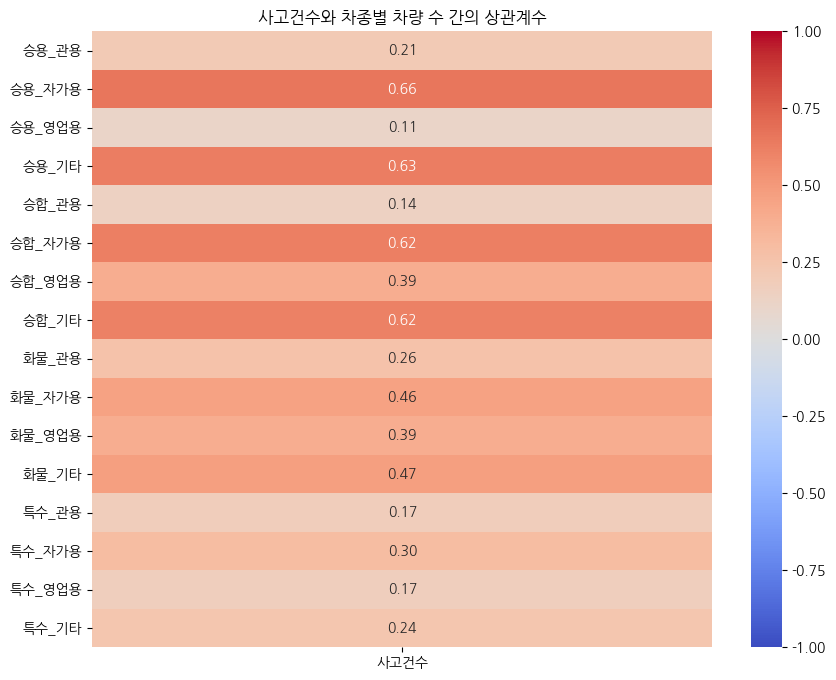

In [23]:
# 차종별 차량 수 컬럼들과 사고건수를 상관계수 계산
correlation_columns = [
    '승용_관용', '승용_자가용', '승용_영업용', '승용_기타',
    '승합_관용', '승합_자가용', '승합_영업용', '승합_기타',
    '화물_관용', '화물_자가용', '화물_영업용', '화물_기타',
    '특수_관용', '특수_자가용', '특수_영업용', '특수_기타',
    '사고건수'
]

# 상관계수 계산 (사고건수와 차종별 차량 수 간의 관계)
correlation = df1[correlation_columns].corr() # 데이터프레임의 각 컬럼 간 상관계수 계산

# 사고건수와 차종별 차량 수 간의 상관계수만 추출
# '사고건수'와 차종 컬럼간의 상관계수만 필요하므로 '사고건수' 컬럼을 기준으로 필터링
correlation_accidents = correlation['사고건수'].drop('사고건수')
print(correlation_accidents)

# 상관계수 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_accidents.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('사고건수와 차종별 차량 수 간의 상관계수')
plt.show()



---
## 주요 질문 2. 차량 종류와 지역별 교통사고건수 간의 상관관계는 어떠할까?


In [20]:
df2 = final_df.copy()

              서울        부산        강원        충북        충남        전북        전남  \
승용_관용  -0.084268  0.094182  0.791849  0.601724  0.194775  0.664058  0.658566   
승용_자가용  0.733802  0.697055  0.901062  0.821585  0.824685  0.871842  0.899970   
승용_영업용  0.606555  0.233581  0.941793  0.664132  0.683774  0.670531 -0.074226   
승용_기타   0.742353  0.694787  0.903592  0.818907  0.824890  0.873636  0.807340   
승합_관용  -0.128837 -0.041929  0.715051  0.677367  0.480478  0.634508  0.643055   
승합_자가용  0.494753  0.773906  0.962221  0.662575  0.781079  0.878081  0.930120   
승합_영업용  0.384517  0.496373  0.870364  0.835797  0.803219  0.820147  0.266169   
승합_기타   0.515150  0.786005  0.960181  0.712518  0.793066  0.889221  0.891473   
화물_관용   0.070891  0.411238  0.704627  0.318065  0.341773  0.511822  0.683550   
화물_자가용  0.597833  0.702428  0.877935  0.547576  0.654896  0.725361  0.808260   
화물_영업용  0.484334  0.056532  0.892952  0.687211  0.678235  0.621688  0.767693   
화물_기타   0.604787  0.707069  0.888990  0.

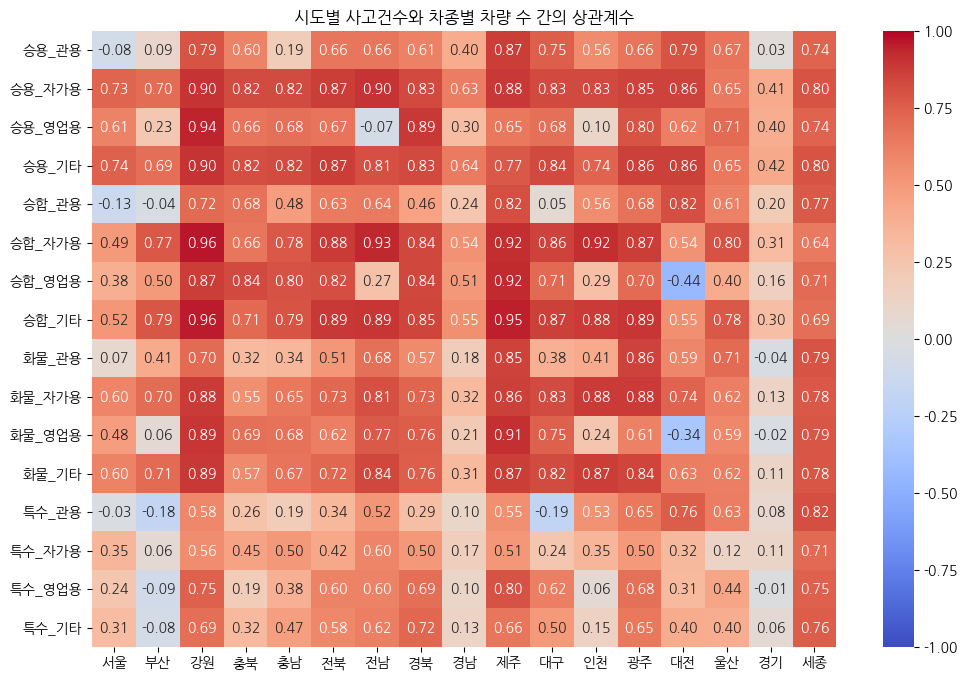

In [22]:
# 시도별로 데이터 그룹화하여 새로운 데이터프레임 생성할 예정
vehicle_columns = [
    '승용_관용', '승용_자가용', '승용_영업용', '승용_기타',
    '승합_관용', '승합_자가용', '승합_영업용', '승합_기타',
    '화물_관용', '화물_자가용', '화물_영업용', '화물_기타',
    '특수_관용', '특수_자가용', '특수_영업용', '특수_기타'
] # 차량 칼럼 리스트

# 시도별로 상관관계 계산
correlation_by_region = {} # 시도별로 계산된 상관계수를 저장할 예정
for region in df2['시도'].unique(): # 지역에 대해 진행
    region_data = df2[df2['시도'] == region] # 해당 '시도'의 데이터만 남김
    correlation = region_data[vehicle_columns + ['사고건수']].corr() # 차종별 차량 수와 사고건수 컬럼 선택 & 상관계수 계산
    correlation_by_region[region] = correlation['사고건수'].drop('사고건수')

# 결과를 데이터프레임으로 변환
correlation_df = pd.DataFrame(correlation_by_region)
print(correlation_df)

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('시도별 사고건수와 차종별 차량 수 간의 상관계수')
plt.show()



---
## 주요 질문 3. 특정 차종 수가 증가할 때 사고건수도 실제로 증가하는가?


In [24]:
df3 = final_df.copy()

In [ ]:
# 그래프의 변화 추이를 보기 위해 정규화 진행
# 정규화 함수
def plot_region_analysis(df3, region):
    # 지역별 데이터 필터링
    df_region = df3[df3['시도'] == region]

    # 연도별 그룹화
    df_region_grouped = df_region.groupby('연도').agg({
        '사고건수': 'sum',
        '승용_자가용': 'sum',
        '승용_기타': 'sum',
        '승합_자가용': 'sum',
        '승합_기타': 'sum'
    }).reset_index()  # 각 연도마다 사고 건수와 차량 유형별 합계를 계산하여 데이터프레임 생성

    # 정규화 / 연도별 사고건수와 차량 수치들의 상대적인 크기를 비교 가능
    scaler_minmax = MinMaxScaler() # 데이터를 [0, 1] 범위로 정규화
    df_normalized = df_region_grouped.copy()
    df_normalized[['사고건수', '승용_자가용','승용_기타','승합_자가용','승합_기타']] = \
        scaler_minmax.fit_transform(df_region_grouped[['사고건수', '승용_자가용','승용_기타','승합_자가용','승합_기타']])

    return df_normalized # 정규화 된 데이터프레임 리턴

      연도      사고건수    승용_자가용     승용_기타    승합_자가용     승합_기타
0   2011  0.847621  0.000000  0.019549  1.000000  1.000000
1   2012  0.895067  0.027043  0.000000  0.903633  0.908214
2   2013  0.720597  0.085220  0.041949  0.826999  0.832038
3   2014  0.890423  0.187062  0.133474  0.741825  0.750686
4   2015  1.000000  0.326316  0.276836  0.647028  0.654768
5   2016  0.795908  0.465485  0.426092  0.553163  0.557023
6   2017  0.618426  0.582103  0.555966  0.464172  0.464598
7   2018  0.639764  0.640247  0.629845  0.376393  0.379155
8   2019  0.697879  0.673015  0.670844  0.281010  0.298187
9   2020  0.191917  0.757531  0.755301  0.199215  0.209604
10  2021  0.026986  0.864060  0.863034  0.121431  0.120506
11  2022  0.000000  0.935847  0.944251  0.057522  0.057291
12  2023  0.014184  1.000000  1.000000  0.000000  0.000000
      연도      사고건수    승용_자가용     승용_기타    승합_자가용     승합_기타
0   2011  0.781875  0.000000  0.000000  1.000000  1.000000
1   2012  1.000000  0.042448  0.033333  0.871600  0.8763

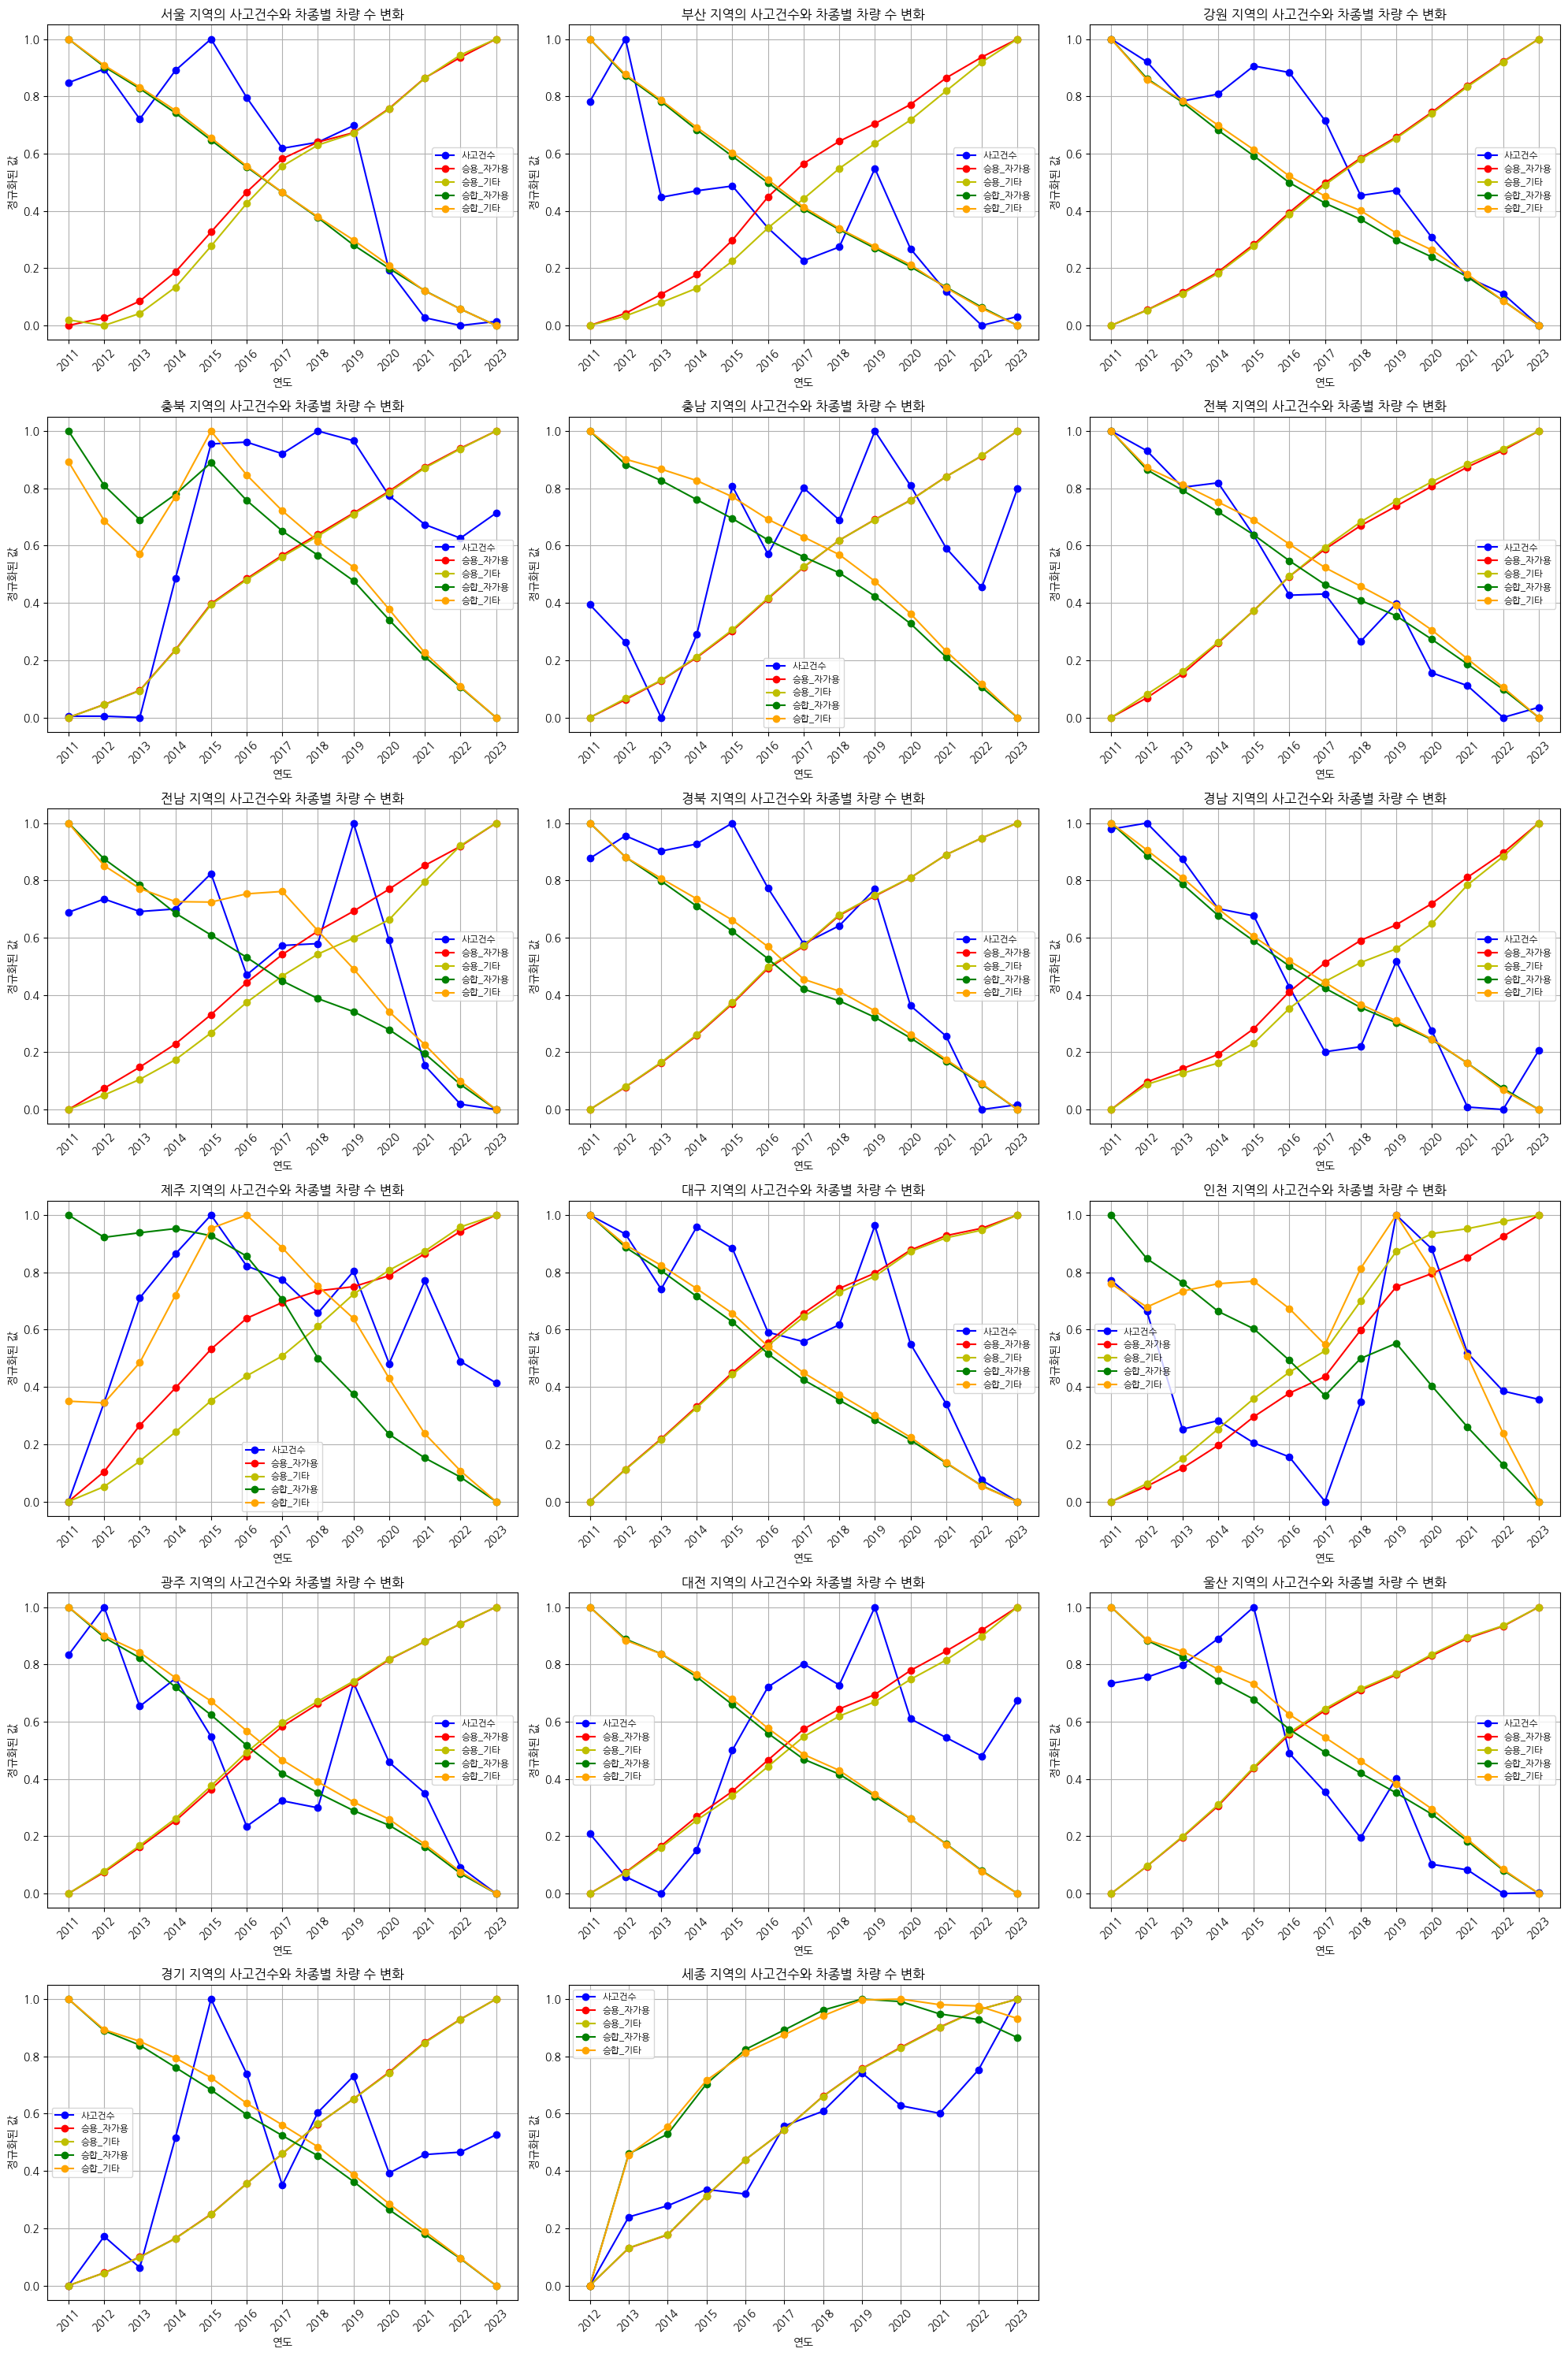

In [26]:
# 전체 지역 리스트
regions = ['서울', '부산', '강원', '충북', '충남', '전북', '전남', '경북', '경남',
          '제주', '대구', '인천', '광주', '대전', '울산', '경기', '세종']

# 그래프 생성
plt.figure(figsize=(20, 30))

for idx, region in enumerate(regions, 1):
    df_normalized = plot_region_analysis(df3, region) # 지역에 따라 정규화 함수를 통해 정규화 된 데이터프레임 받음

    plt.subplot(6, 3, idx) # 17개 시도로 6행 3열씩 배치

    # 각 변수별 선 그래프
    plt.plot(df_normalized['연도'], df_normalized['사고건수'], marker='o', linestyle='-', color='b', label='사고건수')
    plt.plot(df_normalized['연도'], df_normalized['승용_자가용'], marker='o', linestyle='-', color='r', label='승용_자가용')
    plt.plot(df_normalized['연도'], df_normalized['승용_기타'], marker='o', linestyle='-', color='y', label='승용_기타')
    plt.plot(df_normalized['연도'], df_normalized['승합_자가용'], marker='o', linestyle='-', color='g', label='승합_자가용')
    plt.plot(df_normalized['연도'], df_normalized['승합_기타'], marker='o', linestyle='-', color='orange', label='승합_기타')

    # 그래프 꾸미기
    plt.title(f'{region} 지역의 사고건수와 차종별 차량 수 변화')
    plt.xlabel('연도')
    plt.ylabel('정규화된 값')
    plt.xticks(df_normalized['연도'], rotation=45)
    plt.grid(True)
    plt.legend(fontsize='small')

plt.tight_layout()
plt.show()